This model results in quite a few unaccounted-for point pairs, but still manages to get pretty close to the slope from the original model_marker

c:\Users\sjcde\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


88
3.1810225806869044
88
2.9245640339662655
88
3.0161611860358493


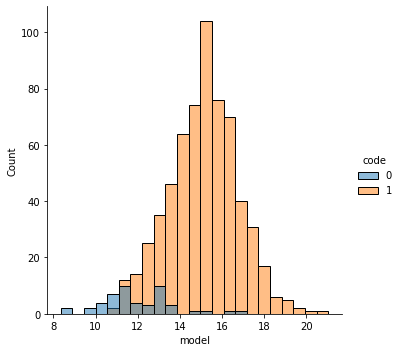

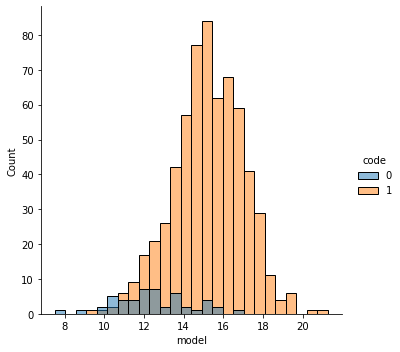

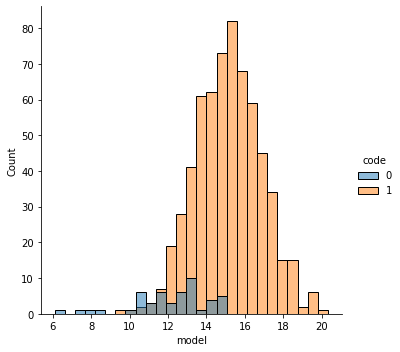

In [23]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
# Generate data
fruit_length_geno = pd.read_table("../data/arabmagic/fruit_length_geno.csv",sep=",",index_col=0)
binary_marker = (fruit_length_geno['MASC06116']=='A').astype(int)
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "MASC06116": binary_marker})
to_model = to_model[~pd.isnull(to_model['fruit_length'])]
binary_marker = (to_model['MASC06116']==1).astype(int)
to_model = sm.add_constant(to_model)

y = to_model["fruit_length"]
X = to_model.loc[:,("MASC06116","const")]
model_marker = sm.OLS(y, X).fit()

# Generate 3 models with model marker
models = []
for _ in range(3):
    models.append(norm.rvs(loc = model_marker.predict(X), scale = 1.7))

# For each model:
for model in models:
    model_frame = pd.DataFrame({'model':model, 'code':binary_marker})
    # Generate a displot of each model with hue=marker_data
    sns.displot(data = model_frame, x = 'model', hue='code')
    # For each pair of consecutive points in the model:
    slope = []
    for i in range(len(model_frame) - 1):
        # Get the slope between the current point and the next point
        # Add it to the list
        curr_pt = model_frame.iloc[i, :]
        next_pt = model_frame.iloc[i+1, :]
        # Make sure there aren't NaNs (1-1 or 0-0)!
        if curr_pt['code'] != next_pt['code']:
            slope.append((next_pt['model'] - curr_pt['model']) / (next_pt['code'] - curr_pt['code']))
    
    # Calculate the average of all of the slopes and print it for each model
    # Figure out how many points are unaccounted for
    print(len(slope))
    print(sum(slope) / len(slope))